In [1]:
%matplotlib notebook

import numpy as np

from scipy.interpolate import splprep, splev

import matplotlib.pyplot as plt
import matplotlib.animation as anim

<IPython.core.display.Javascript object>


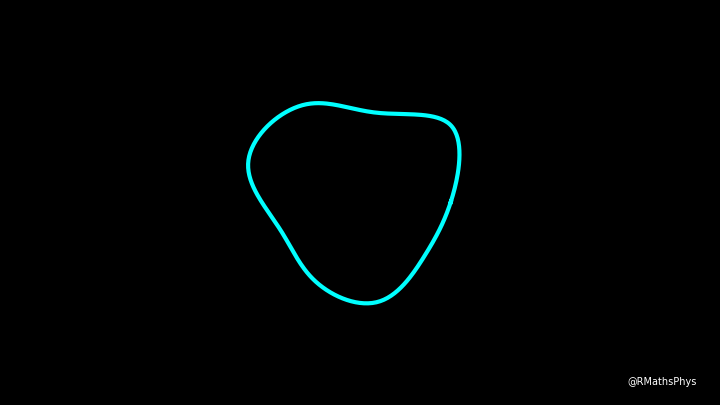

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\_fitpack_impl.py:225: RuntimeWarning: Setting x[1][10]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %


In [2]:
p = 10 # number of control points around the circle
a = np.linspace(0, 2*np.pi, p) # label these points by their angle
r = 1 # radius of the initial circle
s = 0.18 # amplitude of vibrations
q = 2 # an arbitrary shift factor (q=0 means the initial state is a circle)

# Generate random integer frequencies for each control point
w = np.random.randint(22, 32, p)
w[-1] = w[0] # because the first and the last points are the same
w = w/10 # scale the frequencies to be of the order 1

# The radial distance of each control point as a function of time (u)
v = lambda u: r + s*np.sin(2*np.pi*w*u)

# Obtain Cartesian coordinates of each point
x = v(q) * np.cos(a)
y = v(q) * np.sin(a)

# Prepare the figure for plotting
# fine-tuned to easily export as animation later
colour = '#000000'
viewmax = 2
fig, ax = plt.subplots(figsize=(7.2, 4.06), facecolor=colour)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.set(aspect=True, xlim=(-viewmax,viewmax), ylim=(-viewmax,viewmax))
ax.axis(False)
ax.text(x=1.33, y=0.07, transform=ax.transAxes, s='@RMathsPhys',
        ha='right', va='top', fontsize=7, color='white', zorder=10)

# Smoothly interpolate between the control points
tck, u = splprep([x, y], s=0, per=True)

# Compute the (x, y) coordinates for the interpolated curve
xi, yi = splev(np.linspace(0, 1, 300), tck)

# Plot the initial interpolated closed curve
curve, = ax.plot(xi, yi, c='cyan', lw=3)

def evolver(i):
    # Re-calculate the (x, y) positions of each control point
    xf = v(i) * np.cos(a)
    yf = v(i) * np.sin(a)
    
    # Smoothly interpolate between the updated control points
    tckf, uf = splprep([xf, yf], s=0, per=True)
    
    # Compute the (x, y) coordinates for the updated interpolated curve
    xif, yif = splev(np.linspace(0, 1, 300), tckf)
    
    # Plot the updated interpolated closed curve
    curve.set_data([xif, yif])
    return curve

# Magic. Animate!
t = np.linspace(0, 10, 500) + q
ani = anim.FuncAnimation(fig, evolver, frames=t, interval=50, repeat=False)

# # Export as a video files
# metadata = {'title':'Closed Vibrating String', 'author':'RMathsPhys'}
# writer = anim.FFMpegWriter(metadata=metadata, fps=1000/50)
# ani.save('closedvibratingstring.mp4', dpi=350, writer=writer, savefig_kwargs={'facecolor':colour})

plt.show()